In [77]:
%reset -f
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from CTR import *
from CTR.PIticks import PIticks

import sys
sys.path.append('../')
from DFT import DFT 

In [78]:
Sr = Atom(32)
Ti = Atom(22)
O  = Atom(8)
Ru = Atom(44)
Nd = Atom(60)
Ni = Atom(28)
Ga = Atom(31)
Y  = Atom(39)
Al = Atom(13)
W  = Atom(74)
La = Atom(57)
Yb = Atom(70)

#
sto = Perovskite(
    abc = 3.905 * vec(1, 1, 1),
    ABO = (Sr, Ti, O) # Atoms
)
sro = Perovskite(
    abc = Molecule.pseudocubic(5.567, 5.5304, 7.8446),
    ABO = (Sr, Ru, O)
)
nno = Perovskite(
    abc = Molecule.pseudocubic(5.387, 5.383, 7.610),
    ABO = (Nd, Ni, O)
)
ngo = Perovskite(
    abc = Molecule.pseudocubic(5.428, 5.498, 7.708),
    ABO = (Nd, Ga, O)
)
yap = Perovskite(
    abc = Molecule.pseudocubic(5.18, 5.32, 7.37),
    ABO = (Y, Al, O)
)
wo3 = Molecule(
    abc = vec(7.69, 7.69, 7.76)/2,
    structure = [
            W(0.5, 0.5, 0.5),
            *[O(*rj) for rj in (np.ones([3, 3]) - np.eye(3))/2]
        ]
)
lyo = Perovskite(
    abc = vec(6.0233, 8.2080, 5.7203)/2, #Molecule.pseudocubic(6.0233, 8.2080, 5.7203),
    ABO = (La, Yb, O)
)

diff = Perovskite(
    abc = Molecule.pseudocubic(5.567, 5.5304, 7.8446) - 3.905 * vec(1, 1, 1),
    ABO = (Sr, Ru, O)
)

---

# AFF

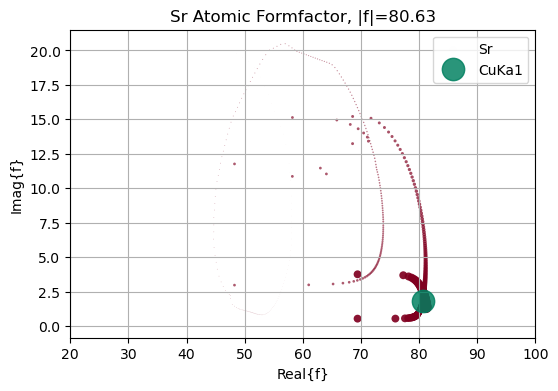

In [79]:
Q = vec(0,0,1)

def PLOTAFF(atom):
	# atom = 'Sr'
	(a1, b1, a2, b2, a3, b3, a4, b4, c) = np.float_(Atom.AFF[Atom.AFF['Element'] == atom].iloc[0].values[1:])
	f0 = sum(c + vec(*[a * np.exp(-1 * b * np.power(np.linalg.norm(Q) / (4 * pi), 2)) for a, b in zip((a1, a2, a3, a4), (b1, b2, b3, b4))]))
	f = pd.read_csv(Atom.PATH+f"/{atom.lower()}.nff", delimiter='\s+')	
	E = f['E(eV)']
	F = (f0 + f['f1']+1j * f['f2'])
	ALPHA = np.linspace(0, 1, len(E)+1)[1:]
	SIZE = E/max(E)*60

	n = np.argmin(abs(E - Xray().Energy))
	# print(n)
	plt.scatter(np.real(F), np.imag(F), marker='o', s=SIZE, linewidth=0, label=f'{atom}', alpha=ALPHA, color='#800020') #, color='#008060'
	# plt.scatter(np.real(F[n]), np.imag(F[n]), marker='o', s=SIZE[n]*10, linewidth=0, label=f'CuKa1', alpha=ALPHA[n], color='#008060') #, color='#008060'
	plt.plot(np.real(F[n]), np.imag(F[n]), marker='o', markersize=SIZE[n], linewidth=0, markerfacecolor=None, label=f'CuKa1', alpha=ALPHA[n], color='#008060') #, color='#008060'
	plt.title(f"{atom} Atomic Formfactor, |f|={np.abs(F[n]):.2f}")
	
	



plt.figure(figsize=(6,4))
# plt.figure(figsize=(12,3))
# plt.scatter(np.real(F), np.imag(F), marker='o', s=SIZE, linewidth=0, label=f'{atom}', alpha=ALPHA) #, color='#006080'
# plt.subplot(1,3,1)
plt.grid(True)
plt.xlim([20, 100])
PLOTAFF('Sr')
# plt.subplot(1,3,2)
# plt.grid(True)
# plt.xlim([0, 60])
# PLOTAFF('Ti')
# plt.subplot(1,3,3)
# plt.grid(True)
# plt.xlim([0, 20])
# PLOTAFF('O')

# plt.ylim([0, 100])
plt.xlabel("Real{f}")
plt.ylabel("Imag{f}")
plt.legend()


# SRO/STO Prob.

In [80]:
Angle = lambda x: np.round(np.rad2deg(np.angle(x)), 10)
# pi 근처 꺼지는 현상 분석
SRO_STO = Film(sro/sto(0,0,1), (1,1,1))
SRO_STO_BL = Film(sro/sto(0,0,1), (1,1,2))

NNO_STO = Film(nno/sto(0,0,1), (1,1,1))
STO_BULK = Film(sto, (1,1,inf))

## SRO/STO

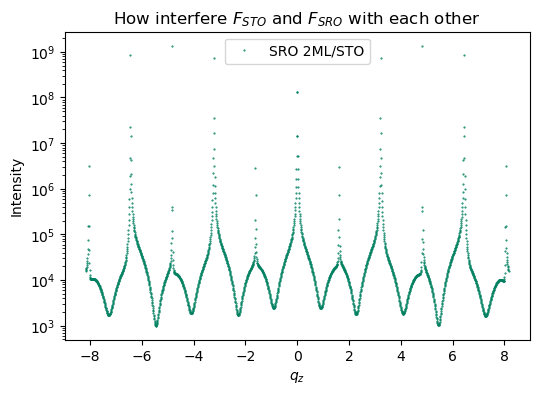

In [81]:
XRD = Xray(Nq=2000)
XRD.Q(0,0,1)
Qz = XRD.Qz
I = XRD.I(SRO_STO/STO_BULK(0,0,1))
I2 = XRD.I(SRO_STO_BL/STO_BULK(0,0,1))
I22 = XRD.I(SRO_STO/SRO_STO/STO_BULK(0,0,1))



# DIFF = Angle(XRD.F(SRO_STO))-Angle(XRD.F(STO_BULK))
# IDX1 = np.where(np.abs(DIFF+180)<0.4)
# IDX2 = np.where(np.abs(DIFF-180)<0.4)
# PEAK = 1621


plt.figure(figsize=(6,4))
# plt.xlim([0,8])
# plt.semilogy(XRD.Qz, I22, color='#800020', linewidth=2, alpha=0.3)
# plt.semilogy(XRD.Qz, I2, color='#008060', linewidth=1, alpha=1, linestyle='dashed')

# plt.semilogy(XRD.Qz, I, color='#800020', label="SRO 1ML/STO", marker='o', markersize=1, linewidth=0)
plt.semilogy(XRD.Qz, I22, color='#008060', label="SRO 2ML/STO", marker='o', markersize=0.5, linewidth=0)

# plt.semilogy(XRD.Qz[PEAK], I[PEAK], marker='o', color='#000000', linewidth=0, label='Target', markersize=12, markerfacecolor='none')
plt.legend()
plt.title("How interfere $F_{STO}$ and $F_{SRO}$ with each other")
plt.ylabel("Intensity")
plt.xlabel("$q_z$")
plt.legend()


In [82]:
[O(*rj) for rj in (np.ones([3, 3]) - np.eye(3))/2]

[(<CTR.CTR.Atom at 0x7fb8111d8040>, 0.0, 0.5, 0.5),
 (<CTR.CTR.Atom at 0x7fb8111d8040>, 0.5, 0.0, 0.5),
 (<CTR.CTR.Atom at 0x7fb8111d8040>, 0.5, 0.5, 0.0)]

## NNO/STO

Text(0.5, 0, '$q_z$')

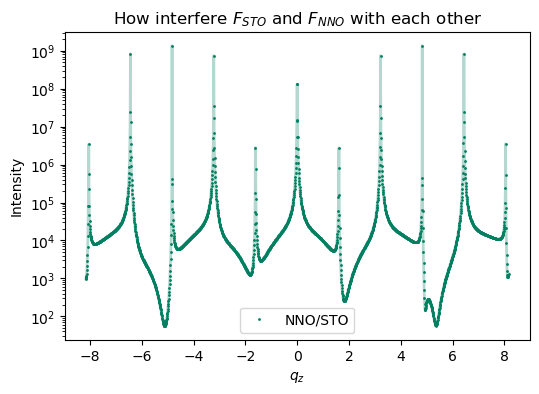

In [83]:
XRD = Xray(Nq=2000)
XRD.Q(0,0,1)
Qz = XRD.Qz
I = XRD.I(NNO_STO/STO_BULK(0,0,1))

NDIF = Angle(XRD.F(NNO_STO))-Angle(XRD.F(STO_BULK))
IDX1 = np.where(np.abs(NDIF+180)<0.6)
IDX2 = np.where(np.abs(NDIF-180)<0.6)

# plt.figure(figsize=(12,9))
plt.figure(figsize=(6,4))
# plt.subplot(3,1,1)
# plt.xlim([0,8])
plt.semilogy(XRD.Qz, I, color='#008060', linewidth=2, alpha=0.3)
plt.semilogy(XRD.Qz, I, color='#008060', label="NNO/STO", marker='o', markersize=1, linewidth=0)
	# plt.semilogy(XRD.Qz[PEAK], I[PEAK], marker='o', color='#000000', linewidth=0, label='Target', markersize=12, markerfacecolor='none')
plt.legend()
plt.title("How interfere $F_{STO}$ and $F_{NNO}$ with each other")
plt.ylabel("Intensity")

plt.xlabel("$q_z$")

## NGO/STO

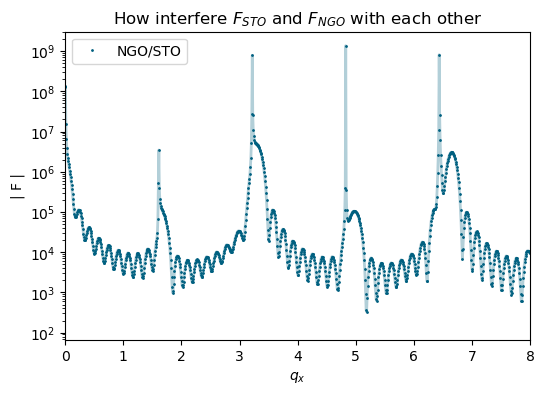

In [84]:
STO_HB  = Film(sto, (inf, 1, 1))
NGO_STO = Film(ngo/sto(1,0,0), (10,1,1))

XRDH = Xray(Nq=2000)
XRDH.Q(1,0,0)
Qx = XRDH.Qx
I = XRDH.I(NGO_STO/STO_HB(1,0,0))

NDIF = Angle(XRDH.F(NGO_STO))-Angle(XRDH.F(STO_HB))
IDX1 = np.where(np.abs(NDIF+180)<1)
IDX2 = np.where(np.abs(NDIF-180)<1)

plt.figure(figsize=(6,4))
plt.xlim([0,8])

plt.semilogy(XRDH.Qx, I, color='#006080', linewidth=2, alpha=0.3)
plt.semilogy(XRDH.Qx, I, color='#006080', label="NGO/STO", marker='o', markersize=1, linewidth=0)
# plt.semilogy(XRDH.Qx[PEAK], I[PEAK], marker='o', color='#000000', linewidth=0, label='Target', markersize=12, markerfacecolor='none')
plt.legend()
plt.title("How interfere $F_{STO}$ and $F_{NGO}$ with each other")
plt.ylabel("Intensity")

plt.xlabel("$q_x$")
plt.ylabel("| F |")
# plt.title("| F |")
plt.legend()
# print(np.abs(XRDH.F(NGO_STO))[1621] - np.abs(XRDH.F(STO_HB))[1621])

## PHASE

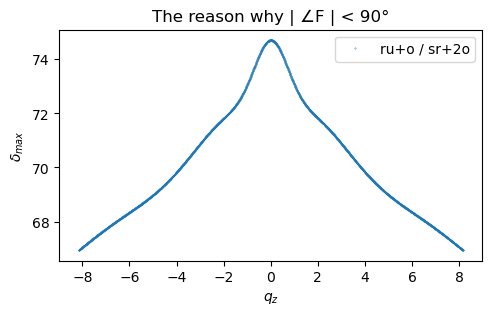

In [85]:
XRD = Xray(Nq=2000)
XRD.Q(0,0,1)
Qz = XRD.Qz
plt.figure(figsize=(12,3))
PHASE = np.exp(1j * Qz * sro.abc[2] / 2)
SR2O = (Sr.aff(XRD.q, XRD.Energy)+ 2*O.aff(XRD.q, XRD.Energy)) * PHASE
RUO  = Ru.aff(XRD.q, XRD.Energy) + O.aff(XRD.q, XRD.Energy)
TIO  = Ti.aff(XRD.q, XRD.Energy) + O.aff(XRD.q, XRD.Energy)

plt.yticks(np.arange(-90, 120, 30))
plt.subplot(1,2,2)

# B+O > A+2O
# B > A + O
# 
# plt.plot(XRD.Qz, np.abs(SR2O)/np.abs(RUO), label='ru+o / sr+2o')
plt.plot(XRD.Qz, np.rad2deg(np.arcsin(np.abs(SR2O)/np.abs(RUO))), label='ru+o / sr+2o', marker='o', markersize=0.3, linewidth=0)
# plt.plot(XRD.Qz, np.abs(SR2O)/np.abs(TIO), label='ti+o / sr+2o')

plt.xlabel("$q_z$")
plt.ylabel("$\delta_{max}$")
plt.title("The reason why | ∠F | < 90°")
plt.legend()

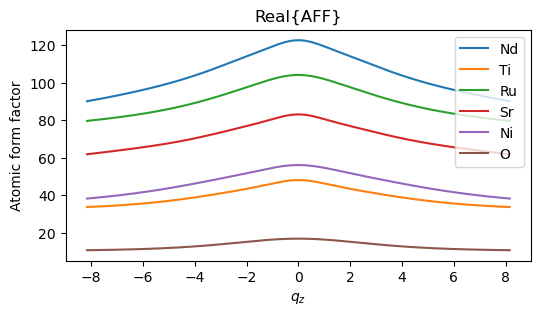

In [86]:
plt.figure(figsize=(6,3))
plt.plot(XRD.Qz, np.real(Nd.aff(XRD.q, XRD.Energy)), label='Nd')
plt.plot(XRD.Qz, np.real(Ti.aff(XRD.q, XRD.Energy)), label='Ti')
plt.plot(XRD.Qz, np.real(Ru.aff(XRD.q, XRD.Energy)), label='Ru')
plt.plot(XRD.Qz, np.real(Sr.aff(XRD.q, XRD.Energy)), label='Sr')
plt.plot(XRD.Qz, np.real(Ni.aff(XRD.q, XRD.Energy)), label='Ni')
plt.plot(XRD.Qz, np.real(O.aff(XRD.q, XRD.Energy)), label='O')
plt.xlabel("$q_z$")
plt.ylabel("Atomic form factor")
plt.title("Real{AFF}")
plt.legend()

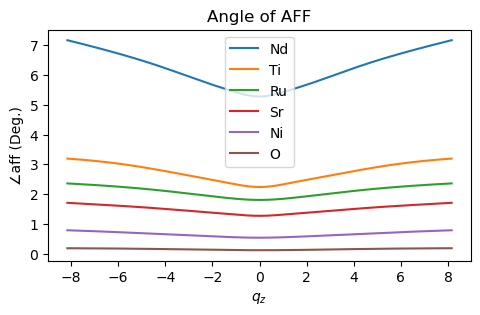

In [87]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(XRD.Qz, Angle(Nd.aff(XRD.q, XRD.Energy)), label='Nd')
plt.plot(XRD.Qz, Angle(Ti.aff(XRD.q, XRD.Energy)), label='Ti')
plt.plot(XRD.Qz, Angle(Ru.aff(XRD.q, XRD.Energy)), label='Ru')
plt.plot(XRD.Qz, Angle(Sr.aff(XRD.q, XRD.Energy)), label='Sr')
plt.plot(XRD.Qz, Angle(Ni.aff(XRD.q, XRD.Energy)), label='Ni')
plt.plot(XRD.Qz, Angle(O.aff(XRD.q, XRD.Energy)), label='O')
# plt.plot(XRD.Qz, Angle(Sr.aff(XRD.q, XRD.Energy)+ 2*O.aff(XRD.q, XRD.Energy)), label='Sr2O')
# plt.plot(XRD.Qz, Angle(Ti.aff(XRD.q, XRD.Energy)+ O.aff(XRD.q, XRD.Energy)), label='TiO')
plt.xlabel("$q_z$")
plt.ylabel("∠aff (Deg.)")
plt.title("Angle of AFF")
plt.legend()
# plt.subplot(1,2,2)
# plt.plot(XRD.Qz, Angle(SRO_STO.SN(XRD.q)), label='SRO', marker='o', markersize=0.5, linewidth=0, color='#008060')
# plt.plot(XRD.Qz, Angle(STO_BULK.SN(XRD.q)), label='STO_Bulk', marker='o', markersize=0.5, linewidth=0, color='#006080')
# # plt.xlim([0, 8])
# plt.yticks([-180, -90, 0, 90, 180])
# plt.xlabel("$q_z$")
# plt.ylabel("∠aff (Deg.)")
# plt.title("Angle of Slit Function")
# plt.legend()

---

# F plot

Text(0.5, 1.0, 'ML SRO$\\cdot$NNO/STO(001) Complex Plane')

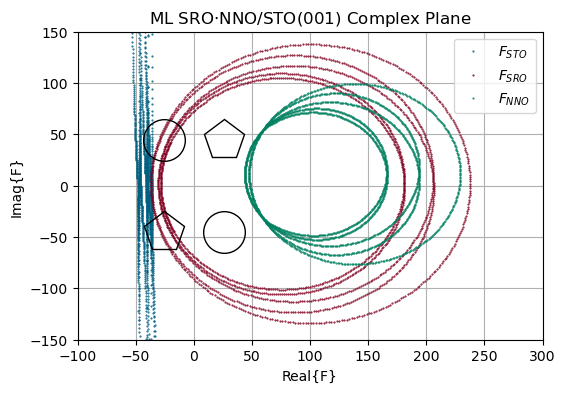

In [88]:
plt.figure(figsize=(6,4))
plt.plot(np.real(XRD.F(STO_BULK)), np.imag(XRD.F(STO_BULK)), marker='o', markersize=0.5, linewidth=0, label='$F_{STO}$', color='#006080')
plt.plot(np.real(XRD.F(SRO_STO)), np.imag(XRD.F(SRO_STO)), marker='o', markersize=0.5, linewidth=0, label="$F_{SRO}$", color='#800020')
plt.plot(np.real(XRD.F(NNO_STO)), np.imag(XRD.F(NNO_STO)), marker='o', markersize=0.5, linewidth=0, label="$F_{NNO}$", color='#008060')

plt.plot(-26, 45, marker='o', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
plt.plot( 26,-45, marker='o', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
plt.plot(-26,-45, marker='p', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
plt.plot( 26, 45, marker='p', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')

# 이 검은 구간에 존재하려면
plt.xlim([-100, 300])
plt.ylim([-150, 150])
plt.grid()
plt.xlabel("Real{F}")
plt.ylabel("Imag{F}")
plt.legend()
plt.title("ML SRO$\cdot$NNO/STO(001) Complex Plane")

Text(0.5, 0.98, 'ML SRO$\\cdot$NNO/STO(001)  Complex Movment')

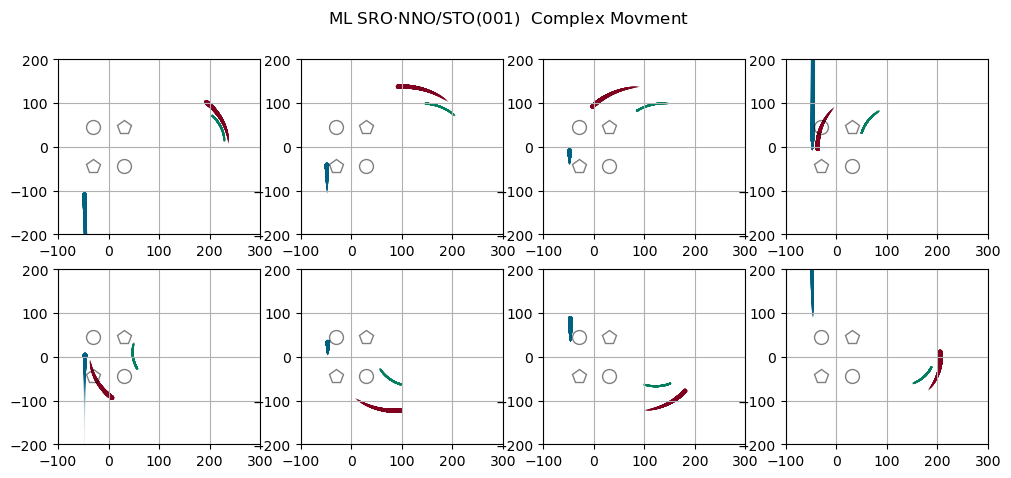

In [89]:
# 3.2 -> 4pi 한주기
ALPHA = np.linspace(0, 1, 1001)[1:]
SIZE = 10 * ALPHA

plt.figure(figsize=(12,5))
# plt.title("ML SRO/STO(001) Complex Plane")
# plt.xlabel("Real{F}")
# plt.ylabel("Imag{F}")
for n in range(8):
	dT = 3.2 / 8
	T0 = n * dT
	XRD2PI = Xray()
	XRD2PI.G = np.linspace(T0, T0+dT, 1001)[1:]
	XRD2PI.Q(0,0,1)
	plt.subplot(2,4,n+1)
	plt.scatter(np.real(XRD2PI.F(STO_BULK)), np.imag(XRD2PI.F(STO_BULK)), marker='o', s=SIZE, linewidth=0, label='$F_{STO}$', color='#006080', alpha=ALPHA)
	plt.scatter(np.real(XRD2PI.F(SRO_STO)), np.imag(XRD2PI.F(SRO_STO)), marker='o', s=SIZE, linewidth=0, label="$F_{SRO}$", color='#800020', alpha=ALPHA)
	plt.scatter(np.real(XRD2PI.F(NNO_STO)), np.imag(XRD2PI.F(NNO_STO)), marker='o', s=2, linewidth=0, label="$F_{NNO}$", color='#008060', alpha=ALPHA)
	plt.plot(-30, 45, marker='o', color='#000000', linewidth=0, markersize=10, markerfacecolor='none', alpha=0.5)
	plt.plot( 30,-45, marker='o', color='#000000', linewidth=0, markersize=10, markerfacecolor='none', alpha=0.5)
	plt.plot(-30,-45, marker='p', color='#000000', linewidth=0, markersize=10, markerfacecolor='none', alpha=0.5)
	plt.plot( 30, 45, marker='p', color='#000000', linewidth=0, markersize=10, markerfacecolor='none', alpha=0.5)

	plt.xlim([-100, 300])
	# plt.ylim([-150, 150])
	plt.ylim([-200, 200])
	plt.grid()
# plt.legend()
plt.suptitle("ML SRO$\cdot$NNO/STO(001)  Complex Movment")

Text(0.5, 1.0, 'NGO/STO(100) [N=10] Complex Plane')

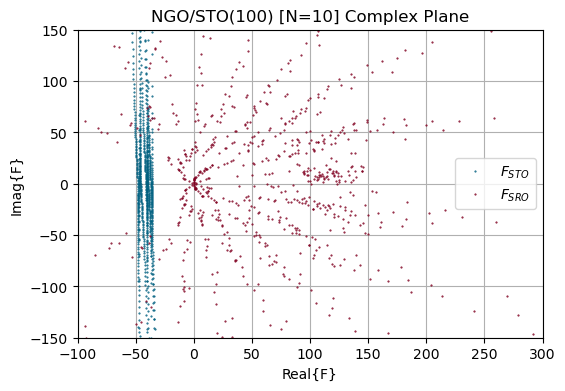

In [90]:
XRD0TO8 = Xray()
# XRD0TO8.G = np.linspace(-8, 8, 10000)[1:]
XRD0TO8.Q(1,0,0)

plt.figure(figsize=(6,4))
plt.plot(np.real(XRD0TO8.F(STO_HB)), np.imag(XRD0TO8.F(STO_HB)), marker='o', markersize=0.5, linewidth=0, label='$F_{STO}$', color='#006080')
plt.plot(np.real(XRD0TO8.F(NGO_STO)), np.imag(XRD0TO8.F(NGO_STO)), marker='o', markersize=0.5, linewidth=0, label="$F_{SRO}$", color='#800020')
# plt.plot(np.real(XRD0TO8.F(NNO_STO)), np.imag(XRD0TO8.F(NNO_STO)), marker='o', markersize=0.5, linewidth=0, label="$F_{NNO}$", color='#008060')

# plt.plot(-26, 45, marker='o', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
# plt.plot( 26,-45, marker='o', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
# plt.plot(-26,-45, marker='p', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')
# plt.plot( 26, 45, marker='p', color='#000000', linewidth=0, markersize=30, markerfacecolor='none')

# 이 검은 구간에 존재하려면
plt.xlim([-100, 300])
plt.ylim([-150, 150])
plt.grid()
plt.xlabel("Real{F}")
plt.ylabel("Imag{F}")
plt.legend()
plt.title("NGO/STO(100) [N=10] Complex Plane")

Text(0.5, 0.98, 'NGO/STO(100) [N=10] Complex Movment')

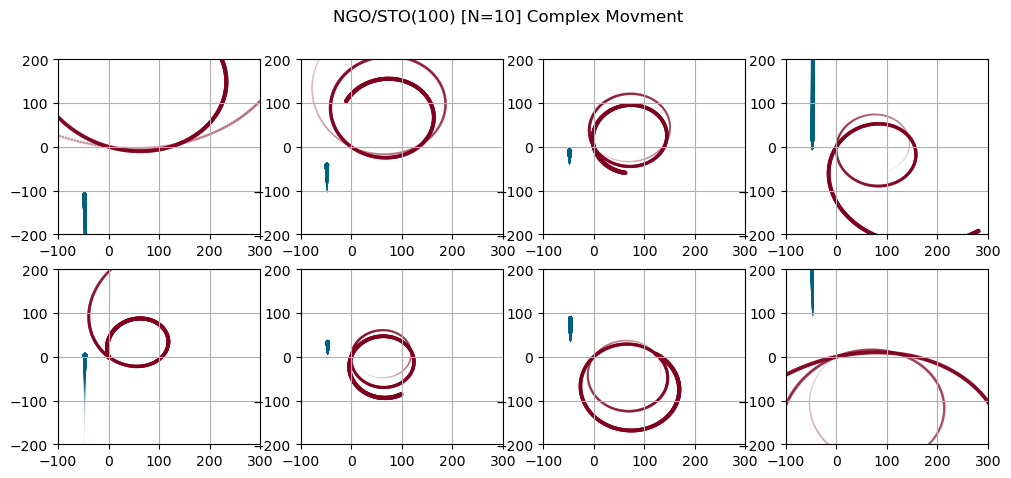

In [91]:
# 3.2 -> 4pi 한주기
# dT = 3.2 / 16
NN = 1001
dT = 3.2 / 8
ALPHA = np.linspace(0, 1, NN)[1:]
SIZE = 10 * ALPHA

plt.figure(figsize=(12,5))
plt.title("Complex Plane")
# plt.xlabel("Real{F}")
# plt.ylabel("Imag{F}")
for n in range(8):
	T0 = n * dT
	XRD2PI = Xray()
	XRD2PI.G = np.linspace(T0, T0+dT, NN)[1:]
	XRD2PI.Q(1,0,0)
	plt.subplot(2,4,n+1)
	plt.scatter(np.real(XRD2PI.F(STO_HB)), np.imag(XRD2PI.F(STO_HB)), marker='o', s=SIZE, linewidth=0, label='$F_{STO}$', color='#006080', alpha=ALPHA)
	plt.scatter(np.real(XRD2PI.F(NGO_STO)), np.imag(XRD2PI.F(NGO_STO)), marker='o', s=SIZE, linewidth=0, label="$F_{SRO}$", color='#800020', alpha=ALPHA)
	plt.xlim([-100, 300])
	# plt.ylim([-150, 150])
	plt.ylim([-200, 200])
	plt.grid()
# plt.legend()
plt.suptitle("NGO/STO(100) [N=10] Complex Movment")